Projet numérique
===========================================================================

Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
$\begin{cases}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{cases}$
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

## Question 1 

Donner une interprétation physique à chaque terme de la dynamique. 
    Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}_+\times\mathbb{R}_+$. Que peut-on dire de leur stabilité à ce stade ?
    
## Proposition de réponse

### Analyse des termes

On remarque qu'on a l'existence de deux seuils : $\frac\alpha\beta$ et $\frac\gamma\delta$. Si on a moins de prédateurs que $\frac\alpha\beta$, le nombre de proies augmente. Sinon, il diminue.

De même, le nombre de prédateurs ne peut augmenter que si on a **plus** de proies que $\frac\gamma\delta$.

### Points d'équilibre

On écrit le problème sous la forme $\dot X=f(X, t)$ avec $X=(x_1,x_2)$. On a $f(X, t)= (x_1(\alpha -\beta x_2),-x_2(\gamma - \delta x_1))$

Point d'équilibre : $X_0$ tel que $f(X_0)=0$

On doit avoir ($x_{10}=0$ ou $x_{20}=\frac\alpha\beta$) et ($x_{20}=0$ ou $x_{10}=\frac\gamma\delta$).

On obtient donc deux points d'équilibres : $(0, 0)$ et $\overline x:\!=(\frac\gamma\delta,\frac\alpha\beta)$

Quid de leur stabilité ?

* $(0,0)$ : 

* $\overline x$ :

## Question 2

A l'aide des fonctions `meshgrid` et `quiver`, visualiser graphiquement le champ de vecteurs. 
    Intuiter le comportement des solutions. 
    On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.

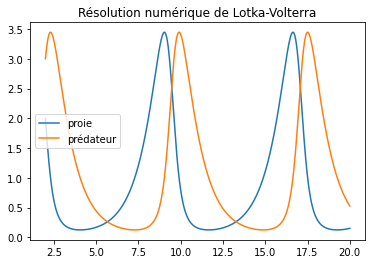

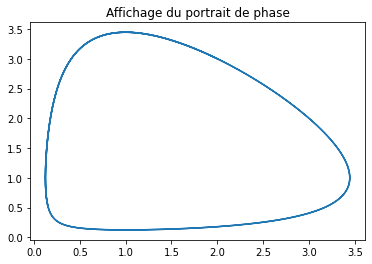

In [119]:
# Modules nécessaires
import numpy as np, matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

# constantes
alpha, beta, gamma, delta = [1., 1., 1., 1.]

# Fonction pour le problème de Cauchy
def f(Y, t):
    x, y = Y
    dxdy = [x*(alpha-beta*y), -y*(gamma-delta*x)]
    return np.array(dxdy)

time = np.linspace(2, 20, 800)
X_0 = [2., 3.]

# Résolution numérique
solve = odeint(f, X_0, time)
#X, Y = np.meshgrid(x, y)

plt.title("Résolution numérique de Lotka-Volterra")
plt.plot(time, solve[:, 0], label="proie")
plt.plot(time, solve[:, 1], label="prédateur")
plt.legend()
plt.show();

plt.title("Affichage du portrait de phase")
plt.plot(solve[:, 0], solve[:, 1])
plt.show();

# # Affichage
# fig, ax = plt.subplots()
# q = ax.quiver(x, y, X, Y)
# ax.quiverkey(q, X=.3, Y=1.1, U=10, label="affichage avec quiver")
# plt.show();

## Question 3

Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans
    $\mathbb{R}_+\times\mathbb{R}_+$ reste dans $\mathbb{R}_+\times\mathbb{R}_+$ sur son ensemble de définition.

## Proposition de réponse

On a, ici, $f:(X, t)\mapsto(x_1(\alpha -\beta x_2),-x_2(\gamma - \delta x_1))$ avec $X=(x_1,x_2)$

Montrons que $f$ est lipschitzienne par rapport à $X$. On a, Pour $(X, Y) = ((x_1,x_2),(y_1,y_2))\in(\mathbb{R}^2)^2$,

$\begin{cases}
||f(X)-f(Y)||^2=(x_1(\alpha -\beta x_2)-y_1(\alpha -\beta y_2))^2+(-x_2(\gamma - \delta x_1) +y_2(\gamma - \delta y_1))^2
\\
||X-Y||^2=(x_1-y_1)^2+(x_2-y_2)^2
\end{cases}$

On utlise le fait que $|xy|\leq\frac{x^2+y^2}2$ pour conclure que $f$ est bien lipschitzienne par rapport à $X$.

Le théorème de Cauchy-Lipschitz nous affirme que si $f$ est lipschitzienne par rapport à la variable fonctionnelle, alors toute solution maximale est globale. Ainsi, une solution initialisée dans $\mathbb{R}_+\times\mathbb{R}_+$ est globale, et reste donc dans $\mathbb{R}_+\times\mathbb{R}_+$ pour son ensemble de définition.

## Question 4

On considère la fonction
    $H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2$
    définie sur $\mathbb{R}_+\times \mathbb{R}_+$.
    Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}_+\times \mathbb{R}_+$. En déduire que toute solution maximale initialisée dans $\mathbb{R}_+\times \mathbb{R}_+$ est définie sur $\mathbb{R}$ et que $\bar{x}$ est stable.

In [77]:
def H(X):
    x, y = X
    return delta*x - gamma*np.log(x)+beta*y-alpha*np.log(y)

## Question 6

Coder une fonction du type

        def solve_euler_explicit(f, x0, dt, t0, tf):
            ...
            return t, x

prenant en entrée une fonction $f:\mathbb{R} \times \mathbb{R}^n \rightarrow \mathbb{R}^n$ quelconque, une condition initiale $x_0$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$. La tester sur une équation différentielle aux solutions exactes connues. Vérifier la convergence du schéma lorsque $dt$ tend vers 0. Comment visualiser graphiquement l'ordre de convergence ?

In [122]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0, tf, dt)
    n = len(t) 
    x = np.array(x0)*np.ones((n, 1))

    for i in range(1, n):
        x0 = x[i-1]
        x[i] = x0+dt*f(x0, t[i])

    return t, x

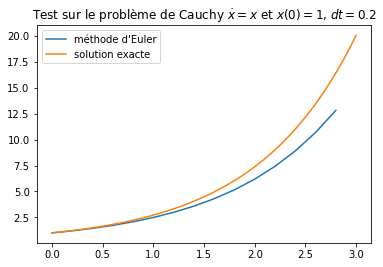

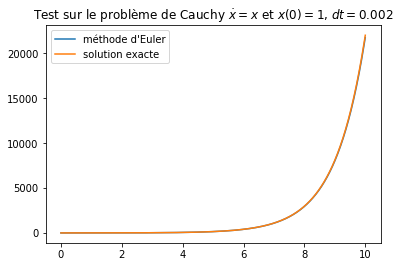

In [99]:
def g(x, t):
    return x

X, Y = solve_euler_explicit(g, 1, .2, 0, 3)
x, y = solve_euler_explicit(g, 1, .002, 0, 10)
T = np.linspace(0, 3, 100)
TT = np.linspace(0, 10, 1000)

plt.title("Test sur le problème de Cauchy $\dot x = x$ et $x(0)=1$, $dt=0.2$")
plt.plot(X, Y, label="méthode d'Euler")
plt.plot(T, np.exp(T), label="solution exacte")
plt.legend()
plt.show();
plt.title("Test sur le problème de Cauchy $\dot x = x$ et $x(0)=1$, $dt=0.002$")
plt.plot(x, y, label="méthode d'Euler")
plt.plot(TT, np.exp(TT), label="solution exacte")
plt.legend()

plt.show();

## Question 7

Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra. 
    Que constate-t-on en temps long ? Cette résolution vous semble-t-elle fidèle à la réalité ? 
    On pourra tracer l'évolution de la fonction $H$.

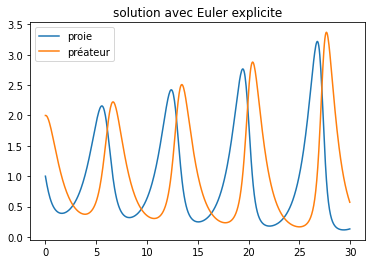

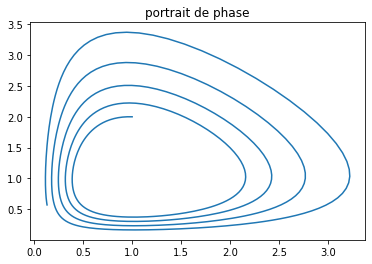

In [133]:
t, values = solve_euler_explicit(f, [1., 2.], .05, 0., 30.)

plt.title("solution avec Euler explicite")
plt.plot(t, values[:, 0], label="proie")
plt.plot(t, values[:, 1], label="préateur")
plt.legend()
plt.show();

plt.title("portrait de phase")
plt.plot(values[:, 0], values[:, 1])
plt.show();

## Proposition de réponse

On remarque que ça ne fonctionne pas aux temps longs : la solution diverge lentement, alors que le nombre maximal de proies/prédateurs ne doit pas bouger.

C'est probablement dû aux erreurs que l'on fait à chaque étape de la méthode d'Euler : ces erreurs se cumulent, et plus on avance, moins ça va ...

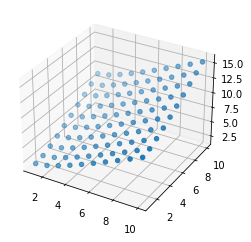

In [96]:
# Affichage de H
x = np.arange(1, 11, 1)
y = np.arange(1, 11, 1)
X, Y = np.meshgrid(x, y)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X, Y, H([X, Y]))
plt.show();

## Question 8

Coder maintenant une fonction du type

        def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
            ...
            return t, x

donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours. Vérifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?


In [146]:
def solve_euler_implicit(f, x0, dt, t0, tf, eps=.1):
    t = np.arange(t0, tf, dt)
    n = len(t) 
    x = np.array(x0)*np.ones((n, 1))
    x_0 = np.array(x0)

    def F(i, y):
        nonlocal x
        return x[i] + dt*f(y, t[i])

    for i in range(1, n):
        x0 = x[i-1]
        x_k = x0+dt*f(x0, t[i])
        x_k1 = F(i, x_k)
        while np.abs((x_k1-x_k)/x_0) >= eps:
            x_k, x_k1 = x_k1, F(i, x_k1)
        x[i] = x_k1

    return t, x

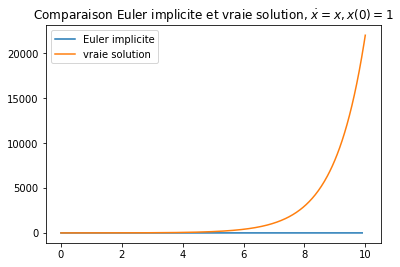

In [150]:
t, x = solve_euler_implicit(g, 1., .1, 0., 10.)
time = np.linspace(0, 10, 500)

plt.title("Comparaison Euler implicite et vraie solution, $\dot x = x, x(0)=1$")
plt.plot(t, x, label="Euler implicite")
plt.plot(time, np.exp(time), label="vraie solution")
plt.legend()
plt.show();